In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp
import scanpy as sc

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/spectral_dataset/",
                          file_name = "raw_dataset")

In [4]:
dataset

AnnData object with n_obs × n_vars = 3103969 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [5]:
### our current gating strategy is imported from the FlowJo Workspace
dataset.uns["gating_cols"]

Index(['root/all_cells', 'root/all_cells/FSC_singlets',
       'root/all_cells/FSC_singlets/live',
       'root/all_cells/FSC_singlets/live/CD45+',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/NK',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T/CD8+T'],
      dtype='object')

In [6]:
### we are only interested in CD45+ cells, so we can subset
fp.subset_gate(dataset,
               gate = "CD45+",
               copy = False)
dataset

AnnData object with n_obs × n_vars = 2227000 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [7]:
### synchronizing the dataset sets an actual state that might be important later to not forget to repeat analyses
fp.sync.synchronize_dataset(dataset)

['obs_names']


     ... updated metadata


In [8]:
### for the vignette, we downsample the dataset significantly
sc.pp.subsample(dataset,
                n_obs = 200_000,
                random_state = 187)

In [9]:
### here, we want to use our own gating from CD45+ cells
### the first option is to use only the cluster information and gate manually using clusters

In [10]:
### we set the default layer to use, which are the transformed data
fp.settings.default_layer = "transformed"
### we also set the default gate, which here is CD45+
fp.settings.default_gate = "CD45+"

### from now on, we can skip the gate and layer keywords for the function
### you can however still override these settings by supplying the arguments
### for transparency, gate and layer are supplied explicitly in this vignette

In [11]:
### the clustering and dimensionality reduction is performed as in scanpy
### note that usually, all these function calls would need a gate and layer keyword argument which we set above
### this vignette covers all keyword arguments for transparency

fp.tl.pca(dataset,
          gate = "CD45+", # unnecessary here as it has been set above
          layer = "transformed", # unnecessary here as it has been set above
          use_only_fluo = True, # whether to use only fluorescence channels, default = True
          exclude = None, # list of channels to exclude for analysis
          scaling = None # whether to apply scaling
          )

In [12]:
### we calculate the neighbors for leiden clustering and umap visualization

fp.tl.neighbors(dataset,
                gate = "CD45+", # unnecessary here as it has been set above
                layer = "transformed", # unnecessary here as it has been set above
                use_only_fluo = True, # whether to use only fluorescence channels, default = True
                exclude = None, # list of channels to exclude for analysis
                scaling = None # whether to apply scaling
                )

In [13]:
### we cluster using the leiden algorithm

fp.tl.leiden(dataset,
             gate = "CD45+", # unnecessary here as it has been set above
             layer = "transformed", # unnecessary here as it has been set above
             use_only_fluo = True, # whether to use only fluorescence channels, default = True
             exclude = None, # list of channels to exclude for analysis
             scaling = None # whether to apply scaling
             )

In [14]:
### and finally we compute the UMAP representation for visualization
fp.tl.umap(dataset,
           gate = "CD45+", # unnecessary here as it has been set above
           layer = "transformed", # unnecessary here as it has been set above
           use_only_fluo = True, # whether to use only fluorescence channels, default = True
           exclude = None, # list of channels to exclude for analysis
           scaling = None # whether to apply scaling
           )

In [15]:
### we have added "X_pca_CD45+_transformed" to the .obsm slot as PCA coordinates as well as settings/variances etc to other slots
### also, leiden clustering information are stored in the obs
### umap coordinates are stored in the obsm slot
### all performed operations are saved with the gate and the underlying data as flow analysis often uses analysis of multiple gates

dataset

AnnData object with n_obs × n_vars = 200000 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'CD45+_transformed_leiden'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'CD45+_transformed_neighbors', 'CD45+_transformed_leiden', 'umap_CD45+_transformed'
    obsm: 'gating', 'X_pca_CD45+_transformed', 'X_umap_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'
    obsp: 'CD45+_transformed_neighbors_connectivities', 'CD45+_transformed_neighbors_distances'

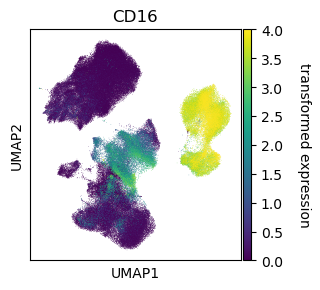

In [16]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD16",
           vmin = 0,
           vmax = 4)

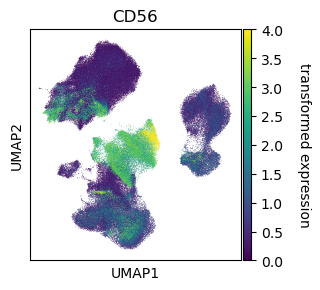

In [17]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD56",
           vmin = 0,
           vmax = 4)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


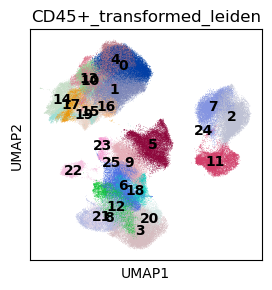

In [18]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

In [19]:
fp.convert_cluster_to_gate(dataset,
                           obs_column = "CD45+_transformed_leiden",
                           positive_cluster = ["9", "5", "23"],
                           population_name = "NK_cells_clustered",
                           parent_name = "CD45+")

In [20]:
fp.convert_gate_to_obs(dataset,
                       "NK_cells_clustered")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


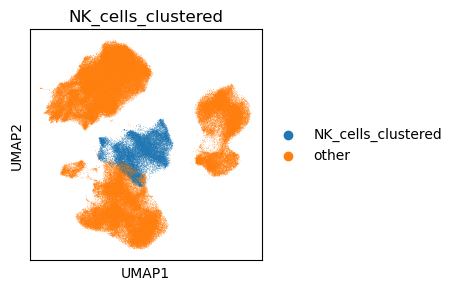

In [21]:
fp.pl.umap(dataset,
           color = "NK_cells_clustered")

In [22]:
### the other way is to gate via the unsupervisedGating class

In [23]:
### the gating strategy is a dictionary
### with the population names as keys
### and a list as values
### where you store the first element as the parent of the population
### and the markers as the second element
### marker with a "+" are considered positive
### markers with a "-" are considered negative
### markers without a "+" or a "-" are also considered positive

gating_strategy = {
    "T_cells": ["CD45+", ["CD3+", "CD45+"]],
    "CD4_T_cells": ["T_cells", ["CD3+", "CD4+", "CD8-", "CD45+"]],
    "CD8_T_cells": ["T_cells", ["CD3+", "CD4-", "CD8+", "CD45+"]]
}

In [24]:
### we setup the classifier...
clf = fp.ml.unsupervisedGating(dataset,
                               gating_strategy = gating_strategy,
                               clustering_algorithm = "leiden", 
                               layer = "transformed",
                               cluster_key = None)

In [25]:
### ... and start the identification
clf.identify_populations()

Analyzing population: T_cells
Analyzing population: CD45+
... sample 6840.fcs


     ... gating population T_cells
... sample 3742.fcs


     ... gating population T_cells
... sample 5143.fcs


     ... gating population T_cells
... sample DO9.fcs


     ... gating population T_cells
... sample DO26.fcs


     ... gating population T_cells
... sample DO6.fcs


     ... gating population T_cells
... sample 6252.fcs


     ... gating population T_cells
... sample DO15.fcs


     ... gating population T_cells
... sample 4337.fcs


     ... gating population T_cells
... sample DO16.fcs


     ... gating population T_cells
... sample 2306.fcs


     ... gating population T_cells
... sample DO12.fcs


     ... gating population T_cells
... sample DO10.fcs


     ... gating population T_cells
... sample DO17.fcs


     ... gating population T_cells
... sample DO27.fcs


     ... gating population T_cells
... sample DO20.fcs


     ... gating population T_cells
... sample DO25.fcs


     ... gating population T_cells
... sample 6042.fcs


     ... gating population T_cells
... sample 4449.fcs


     ... gating population T_cells
... sample 4212.fcs


     ... gating population T_cells
... sample DO13.fcs


     ... gating population T_cells
... sample DO8.fcs


     ... gating population T_cells
... sample DO5.fcs


     ... gating population T_cells
... sample DO11.fcs


     ... gating population T_cells
... sample DO14.fcs


     ... gating population T_cells
... sample DO24.fcs


     ... gating population T_cells
... sample DO21.fcs


     ... gating population T_cells
... sample DO22.fcs


     ... gating population T_cells
... sample DO7.fcs


     ... gating population T_cells
... sample DO1.fcs


     ... gating population T_cells
... sample DO18.fcs


     ... gating population T_cells
... sample DO19.fcs


     ... gating population T_cells
... sample DO4.fcs


     ... gating population T_cells
... sample DO23.fcs


     ... gating population T_cells
... sample DO3.fcs


     ... gating population T_cells
... sample DO2.fcs


     ... gating population T_cells
... sample 6840.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 3742.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 5143.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO9.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO26.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO6.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 6252.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO15.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 4337.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO16.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 2306.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO12.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO10.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO17.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO27.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO20.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO25.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 6042.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 4449.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 4212.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO13.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO8.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO5.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO11.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO14.fcs


computing PCA for leiden
computing neighbors for leiden!


     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO24.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO21.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells


     ... gating population CD8_T_cells
... sample DO22.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO7.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells


     ... gating population CD8_T_cells
... sample DO1.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO18.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO19.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO4.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO23.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO3.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample DO2.fcs


computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells


In [26]:
### we convert the gates to a valid obs_column for display
fp.convert_gate_to_obs(dataset, "T_cells")
fp.convert_gate_to_obs(dataset, "CD4_T_cells")
fp.convert_gate_to_obs(dataset, "CD8_T_cells")

In [27]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD45+"

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


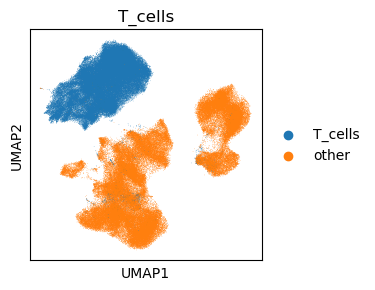

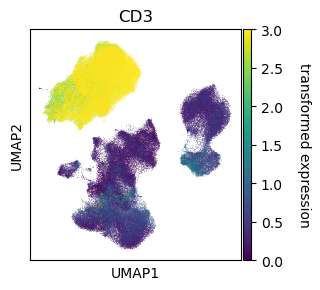

In [28]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD3",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


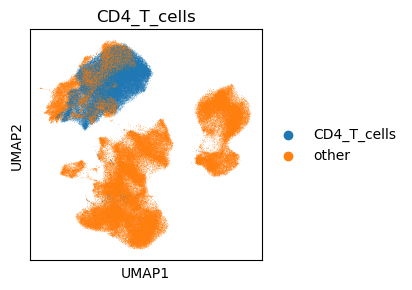

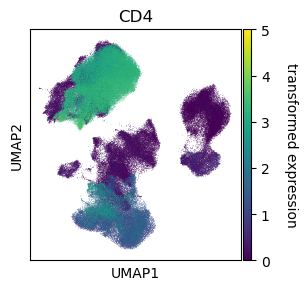

In [29]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD4_T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD4",
           vmin = 0,
           vmax = 5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


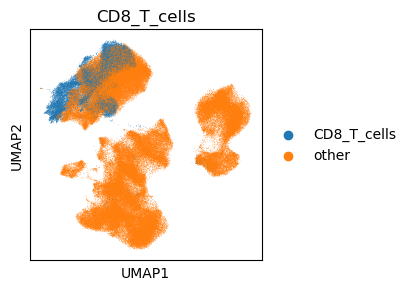

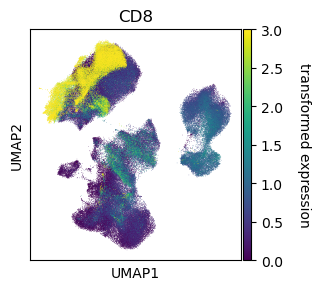

In [30]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD8_T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD8",
           vmin = 0,
           vmax = 3)

In [31]:
### in order to get a better visualization, we have to look at UMAP1 vs. UMAP3

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

df = dataset.to_df(layer = "transformed")
df[dataset.obs.columns] = dataset.obs
df[["UMAP1", "UMAP2", "UMAP3"]] = dataset.obsm["X_umap_CD45+_transformed"]

In [33]:
for col in ["CD3", "CD4", "CD8"]:
    low,high = df[col].quantile([.1,.9])
    df[col] = df[col].clip(low,high)

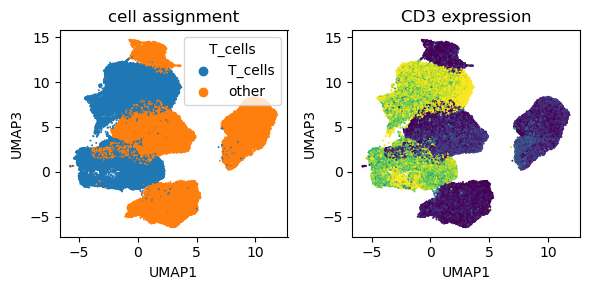

In [34]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (6,3))
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                hue = "T_cells",
                s = 2,
                ax = ax[0],
                linewidth = 0)
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                s = 2,
                c = df["CD3"],
                ax = ax[1],
                linewidth = 0)
ax[0].set_title("cell assignment")
ax[1].set_title("CD3 expression")
plt.tight_layout()
plt.show()

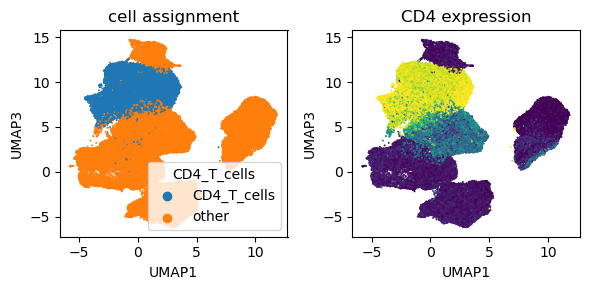

In [35]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (6,3))
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                hue = "CD4_T_cells",
                s = 2,
                ax = ax[0],
                linewidth = 0)
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                s = 2,
                c = df["CD4"],
                ax = ax[1],
                linewidth = 0)
ax[0].set_title("cell assignment")
ax[1].set_title("CD4 expression")
plt.tight_layout()
plt.show()

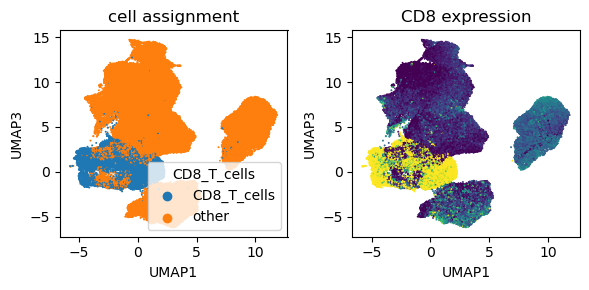

In [36]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (6,3))
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                hue = "CD8_T_cells",
                s = 2,
                ax = ax[0],
                linewidth = 0)
sns.scatterplot(data = df,
                x = "UMAP1",
                y = "UMAP3",
                s = 2,
                c = df["CD8"],
                ax = ax[1],
                linewidth = 0)
ax[0].set_title("cell assignment")
ax[1].set_title("CD8 expression")
plt.tight_layout()
plt.show()

In [37]:
dataset.uns["gating_cols"]

Index(['root/all_cells', 'root/all_cells/FSC_singlets',
       'root/all_cells/FSC_singlets/live',
       'root/all_cells/FSC_singlets/live/CD45+',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/NK',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T',
       'root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T/CD8+T',
       'root/all_cells/FSC_singlets/live/CD45+/NK_cells_clustered',
       'root/all_cells/FSC_singlets/live/CD45+/T_cells',
       'root/all_cells/FSC_singlets/live/CD45+/T_cells/CD4_T_cells',
       'root/all_cells/FSC_singlets/live/CD45+/T_cells/CD8_T_cells'],
      dtype='object')

In [38]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/spectral_dataset",
                file_name = "raw_dataset_gated",
                overwrite = True)

File saved successfully
